<center><h1 style="color:purple; background-color:#CBC3E3; padding:10px;">Interactive Movie Recommendation System</h1></center>

Welcome to your interactive movie recommendation system! In this project, I aim to take you on a journey through the world of cinema, building up your curiosity along the way. The project contains three different parts.

## Part 1: Data Collection and Visualization

- Our journey begins with data. I start by working with the top 1000 IMDb movies based on IMDb ratings database. In the first part I aim to show the data and explain the it first through text, and then throughout visuallization. 


## Part 2: Interactive Search Engine

- In the second part the interactive search engine allows you to search for movies based on specific criteria. Whether you're looking for a particular genre, director, or srae, the search engine will help you discover new movies to watch.

## Part 3: Machine Learning Model

- In the final part of our journey, I utilized the power of Machine Learning. Using scikit-learn trained model on a subset of our dataset. The model will suggest movies based on the specific features. By analyzing these features, the trained model can provide personalized recommendations tailored just for you.


- <h1 style="color:black; padding:10px;">importing modules</h1>

In [93]:
import pandas as pd
import re
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import Text, Output
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**<h1 style="text-align:center;">- Data Collection and Visualization -</h1>**
<hr style="border: 1px solid black;">

                                 
- ### This dataset was retrieved from Kaggle: 

https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

- reading the data and selecting columns to use
- setting the index to be Rank

In [94]:
df = pd.read_csv('imdb_top_1000.csv', usecols=['Series_Title', 'Released_Year', 'Runtime', 
                                               'Genre', 'IMDB_Rating', 'Meta_score', 'Director',
                                              'Star1','Star2','Star3','Star4','No_of_Votes'])

df.index.name = 'Rank'

In [95]:
df.head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes
Rank,,,,,,,,,,,,
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845


- The following code combines the values from columns 'Star1', 'Star2', 'Star3', and 'Star4' into a new column 'Stars' separated by commas, then drops the original star columns and renames two other columns.

- changing the name of some of the columns.
   

In [96]:
df['Stars'] = df['Star1'] + ', ' + df['Star2'] + ', ' + df['Star3'] + ', ' + df['Star4']
df = df.drop(columns=['Star1', 'Star2', 'Star3', 'Star4'])
df = df.rename(columns={'Series_Title': 'Title', 'Meta_score': 'Metascore'})

In [97]:
df.head()

,Title,Released_Year,Runtime,Genre,IMDB_Rating,Metascore,Director,No_of_Votes,Stars
Rank,,,,,,,,,
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."


- The following code identifying the missing values aka NaN values in the dataset.
- Metascore column has 157 missing values.
- <b>Metascore</b> is a rating from the weighted average of professional critics' reviews, ranging from 0-100, where higher scores reflect more favorably.

In [98]:
df.isnull().sum()

Title              0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Metascore        157
Director           0
No_of_Votes        0
Stars              0
dtype: int64

- The following code displays information regarding the 'Metascore' column and explains the use of replacing missing values with the average Metascore. It is a common approach to replace the missing values with the average values. Since its relatively small number (157 out of 1000).
- <b>df['Metascore'].describe()</b>: This function provides descriptive statistics of the 'Metascore' column, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum

In [99]:
df['Metascore'].describe()

count    843.000000
mean      77.971530
std       12.376099
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Metascore, dtype: float64

In [100]:
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())

In [101]:
df.isnull().sum()

Title            0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Metascore        0
Director         0
No_of_Votes      0
Stars            0
dtype: int64

**<h1 style="text-align:center;">Movie Dataset Analysis</h1>**
<hr style="border: 1px solid black;">

- <b>Part 1:</b> Top 10 Movie Stars in the dataset.
- the following code show the top 10 stars in the movie by number of movies in the list, then it takes their average IMDB_Rating, and Metascore, and their best movie on the list


**<h1 style="text-align:center;">Top 10 Actors</h1>**
<hr style="border: 1px solid black;">


In [73]:
top_10_stars = df['Stars'].str.split(', ').explode().value_counts().head(10)
top_10_stars

Stars
Robert De Niro       17
Tom Hanks            14
Al Pacino            13
Clint Eastwood       12
Brad Pitt            12
Christian Bale       11
Leonardo DiCaprio    11
Matt Damon           11
James Stewart        10
Ethan Hawke           9
Name: count, dtype: int64

In [74]:
exploded_df = df.assign(Stars=df['Stars'].str.split(', ')).explode('Stars')


star_stats = exploded_df.groupby('Stars').agg({'IMDB_Rating': ['mean', 'count'], 'Metascore': 'mean'})

star_stats.columns = ['Average_IMDB_Rating', 'Number_of_Movies', 'Average_Metascore']
star_stats.index.name = 'Movie Star'

star_stats['Average_IMDB_Rating'] = star_stats['Average_IMDB_Rating'].round(1)
star_stats['Average_Metascore'] = star_stats['Average_Metascore'].round(1)

star_stats['Actor\'s Best Movie'] = exploded_df.groupby('Stars')['IMDB_Rating'].idxmax().apply(lambda x: df.loc[x]['Title'])

top_10_appearances = star_stats.sort_values(by='Number_of_Movies', ascending=False).head(10)

top_10_appearances = top_10_appearances[['Number_of_Movies', 'Average_IMDB_Rating', 'Average_Metascore', 'Actor\'s Best Movie']]

top_10_appearances


,Number_of_Movies,Average_IMDB_Rating,Average_Metascore,Actor's Best Movie
Movie Star,,,,
Robert De Niro,17,8.1,79.4,The Godfather: Part II
Tom Hanks,14,8.0,79.9,Forrest Gump
Al Pacino,13,8.1,78.8,The Godfather
Brad Pitt,12,8.0,72.4,Fight Club
Clint Eastwood,12,8.0,74.1,"Il buono, il brutto, il cattivo"
Matt Damon,11,8.0,79.4,Saving Private Ryan
Leonardo DiCaprio,11,8.1,74.9,Inception
Christian Bale,11,8.0,72.9,The Dark Knight
James Stewart,10,8.1,90.7,It's a Wonderful Life


**<h1 style="text-align:center;">Top 10 Movies by IMDB Rating and Metascore</h1>**
<hr style="border: 1px solid black;">


- <b>Part 2:</b> Top 10 movies in the dataset.
- The following code shows the Top 10 Movies on the list with highest IMDB Rating and Metascore.
- The code displays dual-axis graph using Plotly, showing  Metascore as a bar chart and IMDB Rating as a dotted line chart, allowing for visual comparison between the two ratings for the top movies.

In [14]:
top_10_movies = df.sort_values('IMDB_Rating', ascending=False).head(10)

fig = go.Figure()

fig.add_trace(go.Bar(x=top_10_movies['Title'], y=top_10_movies['Metascore'], name='Metascore', marker_color='lightblue'))

fig.add_trace(go.Scatter(x=top_10_movies['Title'], y=top_10_movies['IMDB_Rating'], 
                     name='IMDB Rating', marker_color='#1B7593', yaxis='y2'))

fig.update_layout(title='<b>Top 10 Movies by IMDB Rating and Metascore</b>', title_x=0.25,
                  yaxis=dict(title='Metascore'), 
                  yaxis2=dict(title='IMDB Rating', overlaying='y', side='right'), 
                  xaxis=dict(title='Movies'),
                  legend=dict(x=0.35, y=1.2, orientation='h'),)


fig.show()


**<h1 style="text-align:center;">Top 10 Directors</h1>**
<hr style="border: 1px solid black;">

- <b>Part 3:</b> Top 10 directors in the dataset.
- The following code shows the top 10 directors with the most movies in the dataset.
- Then the code groups movies by directors and calculates the number of movies, along with their average Metascore and IMDb rating. Then, it selects the top 10 directors with the most movies and shows their average Metascore and IMDb rating using a graph.

In [77]:
df['Director'].value_counts().head(10)

Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Christopher Nolan     8
Quentin Tarantino     8
Name: count, dtype: int64

In [78]:
director_stats = df.groupby('Director').agg({'Title': 'count', 'Metascore': 'mean', 'IMDB_Rating': 'mean'}).reset_index()

top_10_directors = director_stats.sort_values('Title', ascending=False).head(10)

fig = go.Figure()

fig.add_trace(go.Bar(x=top_10_directors['Director'], y=top_10_directors['Metascore'], 
                     name='Average Metascore', marker_color='#D1FFBD', yaxis='y'))

fig.add_trace(go.Scatter(x=top_10_directors['Director'], y=top_10_directors['IMDB_Rating'], 
                         mode='lines+markers', name='Average IMDb Rating', 
                         line=dict(color='green'), yaxis='y2'))


fig.update_layout(
    title='<b>Top 10 Movie Directors and their Avg. Metascore and IMDb Rating</b>',
    title_x=0.5,
    yaxis=dict(title='Avg. Metascore'), 
    yaxis2=dict(title='Avg. IMDB Rating', overlaying='y', side='right'), 
    xaxis=dict(title='Directors'),
    legend=dict(x=0.3, y=1.1, orientation='h'),)

fig.show()


**<h1 style="text-align:center;">Top 5 Genres</h1>**
<hr style="border: 1px solid black;">

- <b>Part 4:</b> Top 5 genres in the dataset.
- The following code shows the top 5 genres in the dataset.
- Using Matplotlib library to create a pie chart.

In [17]:
df['Genre'].value_counts().head(5)

Genre
Drama                     85
Drama, Romance            37
Comedy, Drama             35
Comedy, Drama, Romance    31
Action, Crime, Drama      30
Name: count, dtype: int64

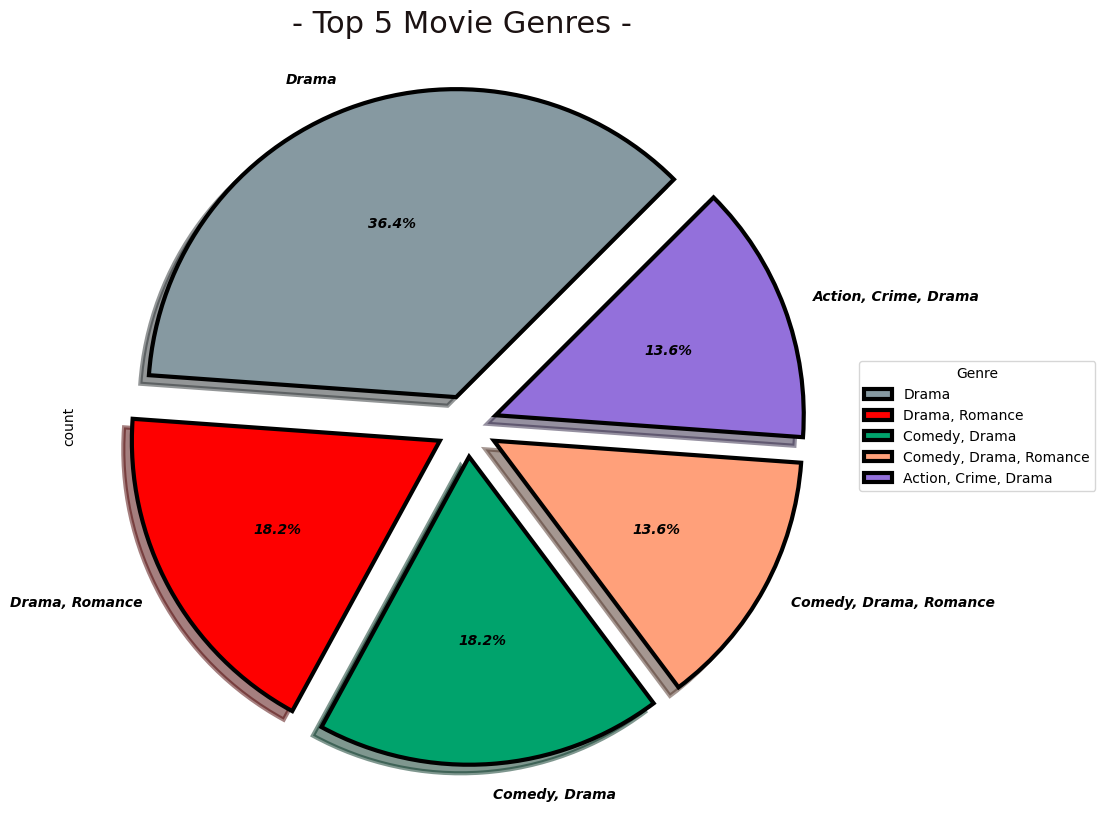

In [18]:
top5 = (df['Genre'].value_counts().head(5) / len(df) * 100).round()


fig = plt.figure(figsize=(10, 10))
colors = ("#8699a1", "#fe0000", "#00A36C", "#FFA07A", "#9370DB")  
wp = {'linewidth': 3, 'edgecolor': "black"}
explode = (0.1,) * len(top5)
textprops = {'fontstyle': 'italic', 'fontweight': 'demi'}


top5.plot(kind='pie', autopct="%0.1f%%", labels=top5.index, startangle=45, colors=colors,
          explode=explode, shadow=True, wedgeprops=wp, textprops=textprops)
plt.legend(title="Genre", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("- Top 5 Movie Genres - ", loc='center', color='#1B1212', fontsize='22')
plt.show()


In [176]:
# Creating a function to search for movies based on user input
def search_movies(title=None, genre=None, imdb_rating=None, metascore=None, director=None, stars=None, runtime=None, released_year=None):

    results = df.copy()

    # Filter by title
    if title:
        # Remove spaces from title
        title = title.replace(" ", "").lower()
        # Search for title ignoring spaces
        results = results[results['Title'].str.lower().str.replace(" ", "").str.contains(title, na=False)]
    
    # Filter by genre
    if genre:
        genre = genre.strip()
        results = results[results['Genre'].str.contains(genre, case=False)]

    # Filter by IMDB rating
    if imdb_rating is not None:
        results = results[results['IMDB_Rating'] >= imdb_rating]

    # Filter by Metascore
    if metascore is not None:
        results = results[results['Metascore'] >= metascore]

    # Filter by director
    if director:
        director = director.strip()
        results = results[results['Director'].str.contains(director, case=False)]

    # Filter by stars
    if stars:
        stars = stars.strip()
        results = results[results['Stars'].str.contains(stars, case=False)]

    # Filter by runtime
    if runtime is not None:
        results = results[results['Runtime'].str.split().str[0].astype(float) >= runtime]

    # Filter by released year
    if released_year:
        results = results[results['Released_Year'].str.startswith(released_year)]

    return results

# Create interactive widgets
title_input = widgets.Text(description='Title:', placeholder='Optional')
genre_input = widgets.Text(description='Genre:', placeholder='Optional')
imdb_rating_input = widgets.FloatText(description='IMDB Rating:', placeholder='Optional')
metascore_input = widgets.IntText(description='Metascore:', placeholder='Optional')
director_input = widgets.Text(description='Director:', placeholder='Optional')
stars_input = widgets.Text(description='Stars:', placeholder='Optional')
runtime_input = widgets.IntText(description='Runtime(min):', placeholder='Optional')
released_year_input = widgets.Text(description='Decade:', placeholder='Optional')
search_button = widgets.Button(description='Search', style={'button_color': '#CBC3E3'})
output = widgets.Output(layout={'overflow': 'scroll'})  

# Interactive function to search for movies based on user input.
def search_movies_interactive(m):
    title = title_input.value.strip() if title_input.value else None 
    genre = genre_input.value.strip() if genre_input.value else None  
    imdb_rating = imdb_rating_input.value if imdb_rating_input.value else None
    metascore = metascore_input.value if metascore_input.value else None
    director = director_input.value.strip() if director_input.value else None  
    stars = stars_input.value.strip() if stars_input.value else None  
    runtime = runtime_input.value if runtime_input.value else None 
    released_year = released_year_input.value.strip() if released_year_input.value else None

    results = search_movies(title, genre, imdb_rating, metascore, director, stars, runtime, released_year)
    
    with output:
        output.clear_output()
        if results.empty:
            display(widgets.HTML("<div style='border: 2px solid black; padding: 15px; text-align: center; background-color: #FFCCCB;'><h2 style='font-size:22px; margin-top: 10px;'>No movies found with the specified criteria</h2></div>"))
        else:
            display(widgets.HTML(f"<div style='border: 2px solid black; padding: 15px; text-align: center; background-color: #D1FFBD;'><h2 style='font-size:22px; margin-top: 10px;'>Found {len(results)} movies with the specified criteria</h2></div>"))
            display(results)
            if title and not results.empty:
                director_of_searched_movie = results.iloc[0]['Director']
                movies_by_director = search_movies(director=director_of_searched_movie)
                if not movies_by_director.empty:
                    display(widgets.HTML(f"<div style='border: 2px solid black; padding: 15px; text-align: center; background-color: #FAA0A0;'><h2 style='font-size:22px; margin-top: 10px;'>Other movies directed by {director_of_searched_movie}</h2></div>"))
                    display(movies_by_director)

# Link the search button to the search function
search_button.on_click(search_movies_interactive)

# Display the widgets
display(title_input, genre_input, imdb_rating_input, metascore_input, director_input, stars_input, runtime_input, released_year_input, search_button, output)


Text(value='', description='Title:', placeholder='Optional')

Text(value='', description='Genre:', placeholder='Optional')

FloatText(value=0.0, description='IMDB Rating:')

IntText(value=0, description='Metascore:')

Text(value='', description='Director:', placeholder='Optional')

Text(value='', description='Stars:', placeholder='Optional')

IntText(value=0, description='Runtime(min):')

Text(value='', description='Decade:', placeholder='Optional')

Button(description='Search', style=ButtonStyle(button_color='#CBC3E3'))

Output(layout=Layout(overflow='scroll'))

**<h1 style="text-align:center;">Your Generative Movie Recommendation Platform**
<hr style="border: 1px solid black;">

- This code performs movie recommendation and exploration based on a dataset loaded into a DataFrame. It preprocesses the runtime feature, splits the data into training and testing sets, and vectorizes movie titles and genres using TF-IDF. It then standardizes the runtime feature and creates feature matrices by concatenating various features like TF-IDF vectors, runtime, IMDB rating, and Metascore. After initializing a K-Nearest Neighbors (KNN) model with cosine similarity metric, it defines input and output widgets for user interaction. Finally, it implements functions to search for movies based on user input, find similar movies, and retrieve movies by the same director. 

In [172]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
test_movies

,Title,Released_Year,Runtime,Genre,IMDB_Rating,Metascore,Director,No_of_Votes,Stars
Rank,,,,,,,,,
521,Trois couleurs: Bleu,1993,94,"Drama, Music, Mystery",7.9,85.00000,Krzysztof Kieslowski,89836,"Juliette Binoche, Zbigniew Zamachowski, Julie ..."
737,Captain America: The Winter Soldier,2014,136,"Action, Adventure, Sci-Fi",7.7,70.00000,Anthony Russo,736182,"Joe Russo, Chris Evans, Samuel L. Jackson, Sca..."
740,Wreck-It Ralph,2012,101,"Animation, Adventure, Comedy",7.7,72.00000,Rich Moore,380195,"John C. Reilly, Jack McBrayer, Jane Lynch, Sar..."
660,The Sandlot,1993,101,"Comedy, Drama, Family",7.8,55.00000,David Mickey Evans,78963,"Tom Guiry, Mike Vitar, Art LaFleur, Patrick Renna"
411,Gandhi,1982,191,"Biography, Drama, History",8.0,79.00000,Richard Attenborough,217664,"Ben Kingsley, John Gielgud, Rohini Hattangadi,..."
678,Evil Dead II,1987,84,"Action, Comedy, Fantasy",7.8,72.00000,Sam Raimi,148359,"Bruce Campbell, Sarah Berry, Dan Hicks, Kassie..."
626,Little Miss Sunshine,2006,101,"Comedy, Drama",7.8,80.00000,Jonathan Dayton,439856,"Valerie Faris, Steve Carell, Toni Collette, Gr..."
513,Children of Men,2006,109,"Adventure, Drama, Sci-Fi",7.9,84.00000,Alfonso Cuarón,465113,"Julianne Moore, Clive Owen, Chiwetel Ejiofor, ..."
859,Repulsion,1965,105,"Drama, Horror, Thriller",7.7,91.00000,Roman Polanski,48883,"Catherine Deneuve, Ian Hendry, John Fraser, Yv..."


In [178]:
movies = df.copy()

# Extract numeric values from the Runtime column
movies["Runtime"] = movies["Runtime"].str.extract('(\d+)').astype(int)

# Split data into train and test sets
train_movies, test_movies = train_test_split(movies, test_size=0.2, random_state=42)

# Vectorize genres
vectorizer_genre = TfidfVectorizer(ngram_range=(1, 2))
tfidf_genre_train = vectorizer_genre.fit_transform(train_movies["Genre"])
tfidf_genre_test = vectorizer_genre.transform(test_movies["Genre"])

# Standardize Runtime
scaler = StandardScaler()
runtime_train = scaler.fit_transform(train_movies["Runtime"].values.reshape(-1, 1))
runtime_test = scaler.transform(test_movies["Runtime"].values.reshape(-1, 1))

# Create feature matrices
feature_matrix_train = np.concatenate([
    tfidf_genre_train.toarray(),
    runtime_train,
    train_movies[["IMDB_Rating", "Metascore"]].values
], axis=1)

feature_matrix_test = np.concatenate([
    tfidf_genre_test.toarray(),
    runtime_test,
    test_movies[["IMDB_Rating", "Metascore"]].values
], axis=1)

# Initialize the KNN model
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(feature_matrix_train)

# Define the input widget
movie_name_input = widgets.Text(placeholder='Search for a movie', description='Movie Name:', disabled=False)

# Define output widget
recommendation_output = widgets.Output()

# Create buttons for feedback
button_yes = widgets.Button(description="Yes")
button_no = widgets.Button(description="No")

# Define feedback question widget
feedback_question = widgets.Label(value='Did you like these suggestions?')

# Assign click handlers to buttons
def handle_feedback_yes(b):
    with recommendation_output:
        print("Glad you liked these suggestions!")

def handle_feedback_no(b):
    with recommendation_output:
        print("Let me suggest something else!")
        suggest_other_movies()

button_yes.on_click(handle_feedback_yes)
button_no.on_click(handle_feedback_no)

# Function to suggest other movies
def suggest_other_movies():
    random_indices = np.random.choice(len(train_movies), 5, replace=False)
    random_movies = train_movies.iloc[random_indices].copy()  # Ensure a copy is made
    cosine_similarities = []
    for idx in random_indices:
        cosine_sim = cosine_similarity(feature_matrix_train[0].reshape(1, -1), feature_matrix_train[idx].reshape(1, -1)).flatten()[0]
        cosine_similarities.append(cosine_sim)
    random_movies.loc[:, 'Cosine Similarity'] = cosine_similarities  # Use .loc to avoid SettingWithCopyWarning
    display(HTML("<div style='border: 2px solid black; padding: 15px; text-align: center; background-color: #F5F5F5;'><h2 style='font-size:22px; margin-top: 10px;'>Additional movies</h2></div>"))
    display(random_movies)

    
# Function to display feedback buttons
def display_feedback_buttons():
    display(widgets.VBox([feedback_question, widgets.HBox([button_yes, button_no])]))

# Function to search for movies based on user input
def search(title, tfidf_title, feature_matrix, movies_data):
    query_vec = vectorizer_title.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_title).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies_data.iloc[indices].iloc[::-1]
    return results

# Function to find similar movies
def find_similar_movies(movie, knn_model, feature_matrix, movies_data):
    movie_index = movies_data[movies_data["Title"] == movie["Title"]].index[0]
    _, neighbors = knn_model.kneighbors(feature_matrix[movie_index].reshape(1, -1), n_neighbors=6)  # Increase to 6 to exclude the input movie
    similar_movies_indices = neighbors[0][1:]  # Exclude the movie itself
    cosine_similarities = []
    for idx in similar_movies_indices:
        cosine_sim = cosine_similarity(feature_matrix[movie_index].reshape(1, -1), feature_matrix[idx].reshape(1, -1)).flatten()[0]
        cosine_similarities.append(cosine_sim)
    similar_movies = movies_data.iloc[similar_movies_indices].copy()
    similar_movies['Cosine Similarity'] = cosine_similarities
    return similar_movies.head(5)  # Return only the top 5 most similar movies

# Function to display recommendations
def on_type(data):
    with recommendation_output:
        recommendation_output.clear_output()

        title = data["new"]
        if len(title) > 1:
            results = search(title, tfidf_title_train, feature_matrix_train, train_movies)
            if not results.empty:
                movie = results.iloc[0]  # Assuming the first result is the most relevant
                display(HTML("<div style='border: 2px solid black; padding: 15px; text-align: center; background-color: #FFCCCB;'><h2 style='font-size:22px; margin-top: 10px;'>Suggested movies based on your search</h2></div>"))
                recommended_movies = find_similar_movies(movie, knn, feature_matrix_train, train_movies)
                display(recommended_movies.style.set_properties(**{'text-align': 'left'}))
                display_feedback_buttons()

# Input widget
movie_name_input.observe(on_type, names='value')

# Display widgets
display(movie_name_input)
display(recommendation_output)


Text(value='', description='Movie Name:', placeholder='Search for a movie')

Output()